# Trying higher degree polynomials

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')

In [2]:
quadratic_data = tc.SFrame(
    {
        'num_rooms': [1,2,3,4,5,6,7,8,9,10],
        'prices': [60,125,170,200,240,260,290,300,310,315],
    }
)
quadratic_data

Columns:
	num_rooms	int
	prices	int

Rows: 10

Data:
+-----------+--------+
| num_rooms | prices |
+-----------+--------+
|     1     |   60   |
|     2     |  125   |
|     3     |  170   |
|     4     |  200   |
|     5     |  240   |
|     6     |  260   |
|     7     |  290   |
|     8     |  300   |
|     9     |  310   |
|     10    |  315   |
+-----------+--------+
[10 rows x 2 columns]

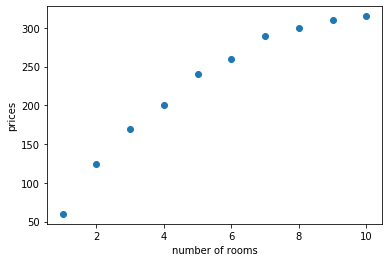

In [3]:
plot_points(quadratic_data['num_rooms'], quadratic_data['prices'])

In [4]:
quadratic_data['num_rooms_squared'] = quadratic_data['num_rooms'].apply(lambda x: x**2)
quadratic_data

Columns:
	num_rooms	int
	prices	int
	num_rooms_squared	int

Rows: 10

Data:
+-----------+--------+-------------------+
| num_rooms | prices | num_rooms_squared |
+-----------+--------+-------------------+
|     1     |   60   |         1         |
|     2     |  125   |         4         |
|     3     |  170   |         9         |
|     4     |  200   |         16        |
|     5     |  240   |         25        |
|     6     |  260   |         36        |
|     7     |  290   |         49        |
|     8     |  300   |         64        |
|     9     |  310   |         81        |
|     10    |  315   |        100        |
+-----------+--------+-------------------+
[10 rows x 3 columns]

In [5]:
polynomial_regression_model = tc.linear_regression.create(quadratic_data, target='prices')

Linear regression:

--------------------------------------------------------

Number of examples          : 10

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.002985     | 14.305886          | 6.032378                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [6]:
polynomial_regression_model.predict(quadratic_data)

dtype: float
Rows: 10
[74.30588591439016, 121.71838131090257, 164.07570044085696, 201.37784330425336, 233.62480990109177, 260.81660023137215, 282.95321429509454, 300.03465209225897, 312.0609136228653, 319.0319988869137]